# <b>Simple K-Means Clustering Example</b>

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [12]:
#create a blob dataset
x,y = make_blobs(n_samples=100,centers=5,random_state=0,cluster_std=0.6)

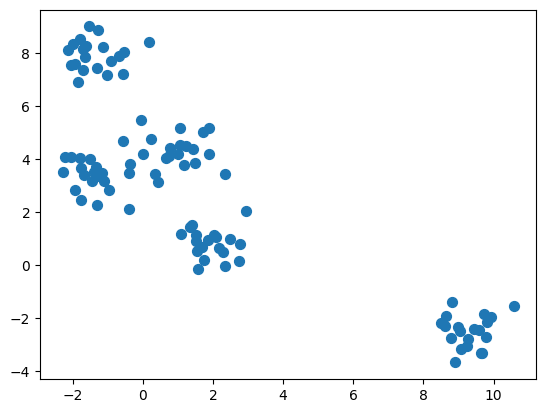

In [13]:
#visualize dataset
plt.scatter(x[:,0],x[:,1],s=50)

In [14]:
#create K-Means model and fit
est = KMeans(5)
est.fit(x)
y_kmeans = est.predict(x)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


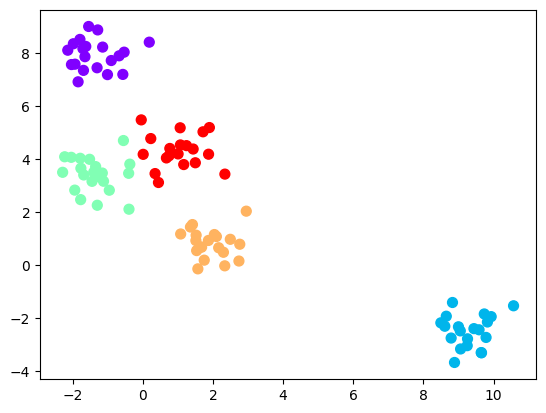

In [15]:
#visualize predicted clusters by our fitted K-Means model
plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50,cmap='rainbow')

# <b>Text Clustering with K-Means Clustering Example</b>

In [16]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# stop words are common words which does not add much meaning to a sentence such as ['I', 'am', 'he', 'she', 'is', 'on', 'in']
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
def tokenizer(text):
    # transform the text into an array of words
    tokens = word_tokenize(text)
    # yields the stem (fishing-fish, fisher-fish)
    stemmer = PorterStemmer()
    # we filter out stopwords
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens

In [28]:
def cluster_sentences(texts, n=2):
    # create TF-IDF again: stopwords-> we filter out common words (I,my, the, and...)
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'), lowercase=True)
    # builds a TF-IDF matrix for the sentences
    matrix = vectorizer.fit_transform(texts)
    # fitting the k-means clustering model
    model = KMeans(n_clusters=n)
    model.fit(matrix)
    topics = collections.defaultdict(list)

    for index, label in enumerate(model.labels_):
        topics[label].append(index)

    return dict(topics)

In [29]:
sentences = ["FOREX is the stock market for trading currencies",
            "Quantuum physics is quite important in science nowadays.",
            "Investing in stocks and trading with them are not that easy",
            "Software engineering is hotter and hotter topic in the silicon valley",
            "Warren Buffet is famous for making good investments. He knows stock markets"]

n_clusters = 2
clusters = cluster_sentences(sentences, n_clusters)

for cluster in range(n_clusters):
    print("CLUSTER ", cluster, ":")
    for i, sentence in enumerate(clusters[cluster]):
        print("\tSENTENCE ", i+1, ": ", sentences[sentence])


CLUSTER  0 :
	SENTENCE  1 :  Quantuum physics is quite important in science nowadays.
	SENTENCE  2 :  Software engineering is hotter and hotter topic in the silicon valley
CLUSTER  1 :
	SENTENCE  1 :  FOREX is the stock market for trading currencies
	SENTENCE  2 :  Investing in stocks and trading with them are not that easy
	SENTENCE  3 :  Warren Buffet is famous for making good investments. He knows stock markets
